<a href="https://colab.research.google.com/github/asadali163/Time-Series-Experiments/blob/main/codebase/GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !wget -o spy.csv https://lazyprogrammer.me/course_files/SPY.csv

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 12.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from arch import arch_model

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.read_csv('SPY.csv', parse_dates=True, index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [ ]:
df['LogReturn'] = np.log(df['Adj Close']).diff()

In [ ]:
df2 = df.iloc[1:].copy()

In [ ]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.002643
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.004213
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.003322
2010-01-11,115.080002,115.129997,114.239998,114.730003,93.385582,106375700,0.001396


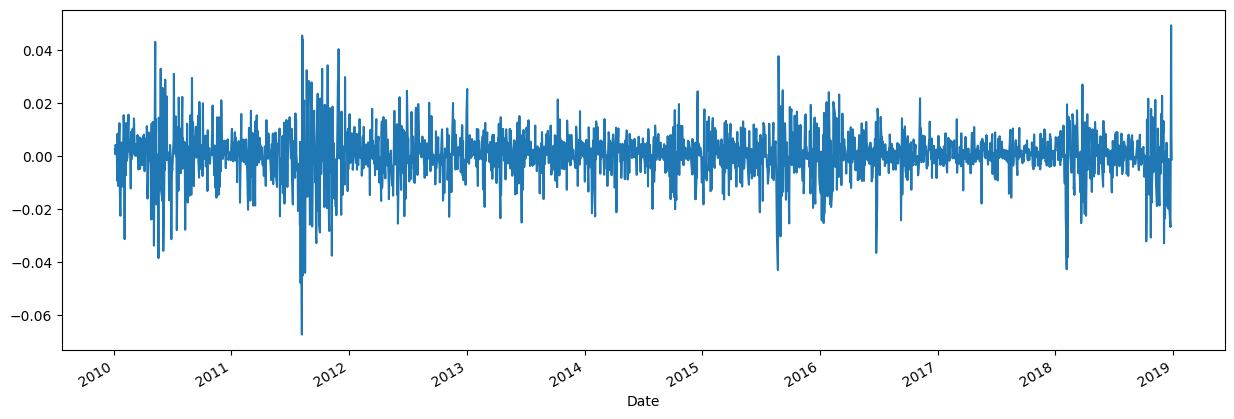

In [ ]:
df2['LogReturn'].plot(figsize=(15,5));

In [ ]:
df2['Ysq'] = df2['LogReturn']**2

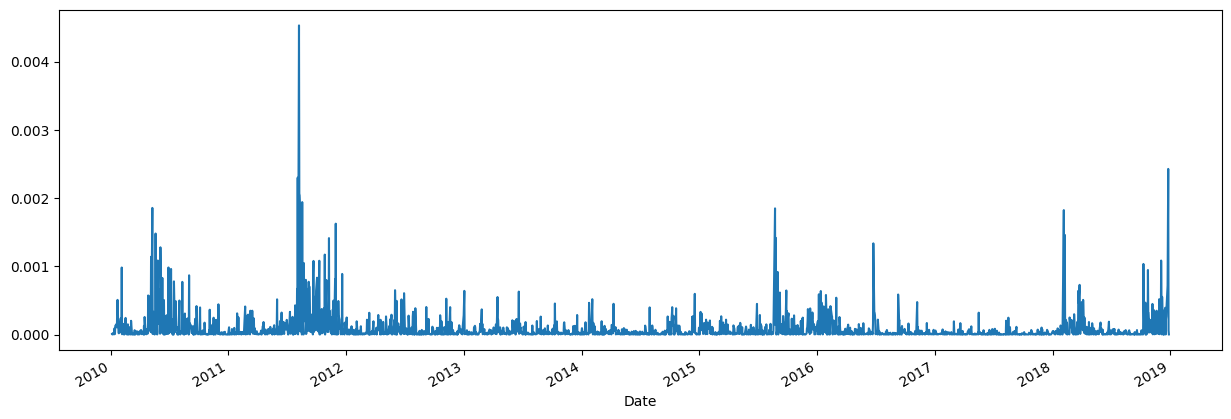

In [ ]:
df2['Ysq'].plot(figsize=(15,5));

## Let's plot the ACF and PACF

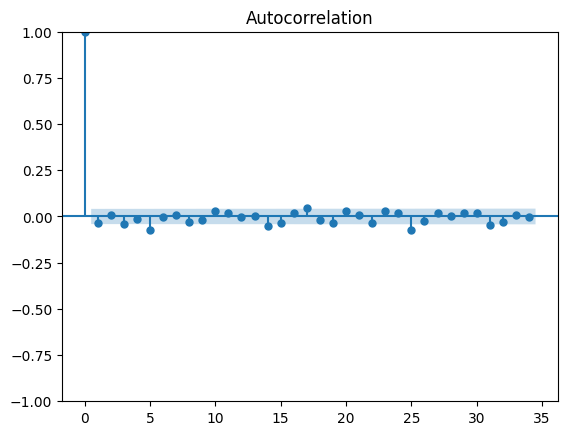

In [ ]:
plot_acf(df2['LogReturn']);

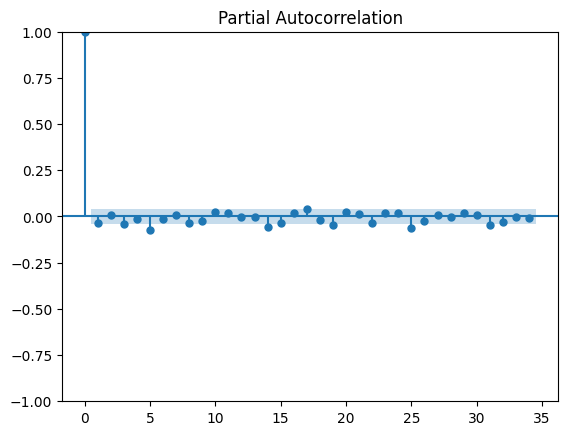

In [ ]:
plot_pacf(df2['LogReturn']);

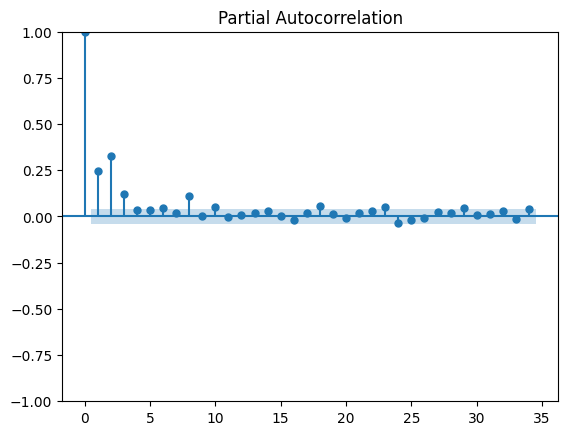

In [ ]:
# Plot pacf for ysq
plot_pacf(df2['Ysq']);

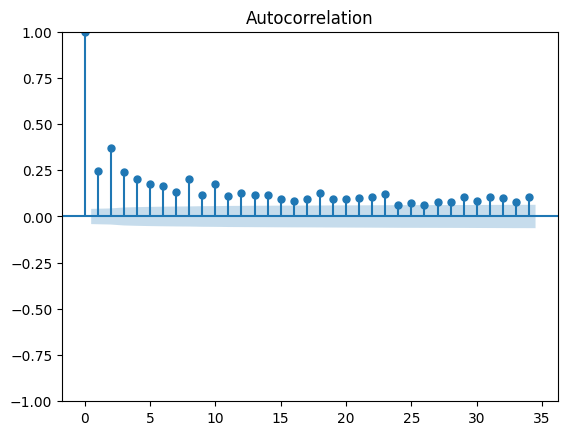

In [ ]:
plot_acf(df2['Ysq']);

As you can see the acf and pacf of the squared series has some importance

Let's check the acf and pacf of random noise

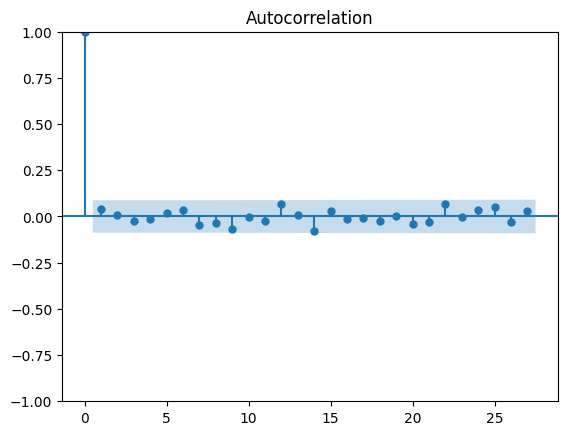

In [ ]:
random_noise = np.random.randn(500)
plot_acf(random_noise);

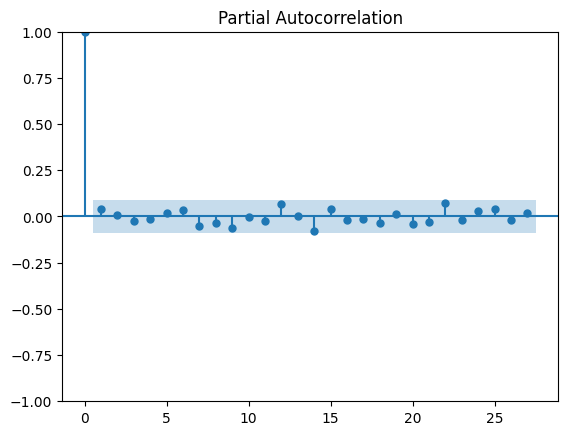

In [ ]:
plot_pacf(random_noise);

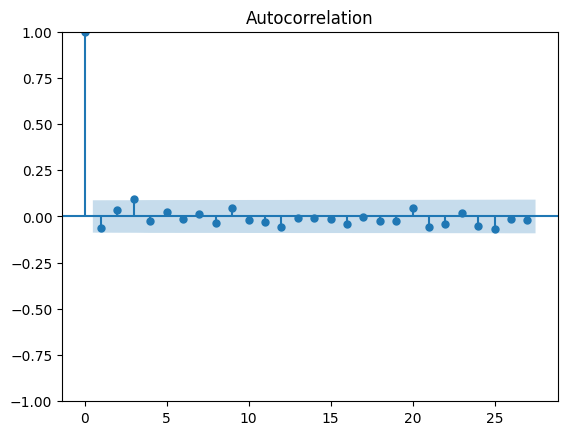

In [ ]:
## SQUARE ROOT OF RANDOM NOISE
sqrt_random_noise = random_noise ** 2
plot_acf(sqrt_random_noise);

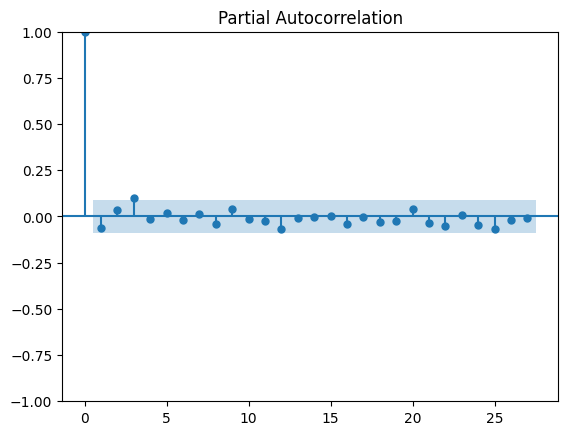

In [ ]:
plot_pacf(sqrt_random_noise);

As you can see these both have no relation, but in stock return we have relation in square root. So indeed it is helpful.

## Train and Test examples

In [ ]:
N_test = 500
train = df2.iloc[:-N_test][['LogReturn']].copy()
test = df2.iloc[-N_test:][['LogReturn']].copy()

In [ ]:
train.head()

,LogReturn
Date,
2010-01-05,0.002643
2010-01-06,0.000704
2010-01-07,0.004213
2010-01-08,0.003322
2010-01-11,0.001396


## Next we will see why we need scaling

In [ ]:
model = arch_model(train['LogReturn'], vol='GARCH', p=1, q=1)

In [ ]:
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1044503142789.7043
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1635380694079.668
Iteration:      3,   Func. Count:     33,   Neg. LLF: -5886.279144117918
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5886.279143761721
            Iterations: 7
            Function evaluations: 33
            Gradient evaluations: 3


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.468e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              LogReturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5886.28
Distribution:                  Normal   AIC:                          -11764.6
Method:            Maximum Likelihood   BIC:                          -11742.7
                                        No. Observations:                 1762
Date:                Fri, Aug 02 2024   Df Residuals:                     1761
Time:                        10:06:02   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.8101e-04  6.954e-06    112.310      0.000 [7.674e-04,7.946e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.4679e-06  6.955e-12  1.361e+06      0.000 [9.468e-06,9.468e-06]
alpha[1]       0.2000  2.554e-02      7.832  4.817e-15     [  0.150,  0.250]
beta[1]        0.7000  1.977e-02     35.400 1.708e-274     [  0.661,  0.739]
============================================================================

Covariance estimator: robust
"""

### ARCH(1)

In [ ]:
m = train['LogReturn'].mean()
s = train['LogReturn'].std()

train['Scaled'] = (train['LogReturn'] - m) / s
test['Scaled'] = (test['LogReturn'] - m) / s
df2['Scaled'] = (df2['LogReturn'] - m) / s

In [ ]:
arch_1 = arch_model(train['Scaled'], vol='ARCH', p=1)

In [ ]:
res_arch_1 = arch_1.fit(update_freq=10)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2456.4916470887574
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 6


In [ ]:
res_arch_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2456.49
Distribution:                  Normal   AIC:                           4918.98
Method:            Maximum Likelihood   BIC:                           4935.41
                                        No. Observations:                 1762
Date:                Fri, Aug 02 2024   Df Residuals:                     1761
Time:                        10:09:53   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0133  2.328e-02      0.570      0.569 [-3.235e-02,5.889e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.8140  6.798e-02     11.974  4.867e-33   [  0.681,  0.947]
alpha[1]       0.1828  4.898e-02      3.731  1.904e-04 [8.676e-02,  0.279]
==========================================================================

Covariance estimator: robust
"""

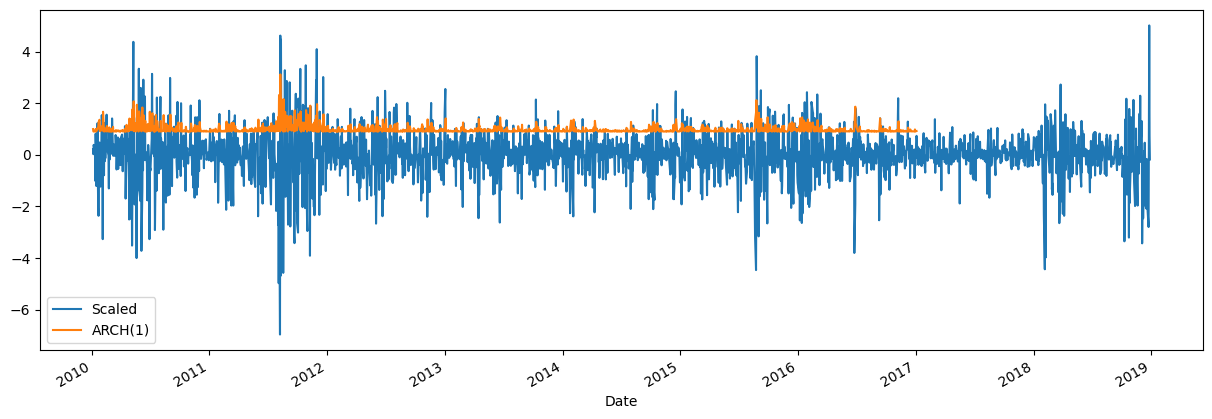

In [ ]:
# Get in sample prediction
df2['ARCH(1)'] = res_arch_1.conditional_volatility
# Plot
df2[['Scaled', 'ARCH(1)']].plot(figsize=(15,5));

In [ ]:
# Now let's forecast the future value. We will have some errors at beginnings
# If we didn't set reindex to something as shown below.
fcast_arch_1 = res_arch_1.forecast(horizon=N_test, reindex=True)

In [ ]:
# Now this will give us prediction (although it is NaN) from start to end date
fcast_arch_1.mean

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you can see it has same mean because we use the zero mean

In [ ]:
fcast_arch_1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Let's set the reindex = False
fcast_arch_1 = res_arch_1.forecast(horizon=N_test, reindex=False) # We can specify the start argument as well.

In [ ]:
fcast_arch_1.mean

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.013266,0.013266,0.013266,0.013266,0.013266,0.013266,0.013266,0.013266,0.013266,0.013266,...,0.013266,0.013266,0.013266,0.013266,0.013266,0.013266,0.013266,0.013266,0.013266,0.013266


In [ ]:
fcast_arch_1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.909102,0.980152,0.993137,0.99551,0.995943,0.996022,0.996037,0.99604,0.99604,0.99604,...,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604


As you can see now it has only give us the final prediction. and it is multistep prediction

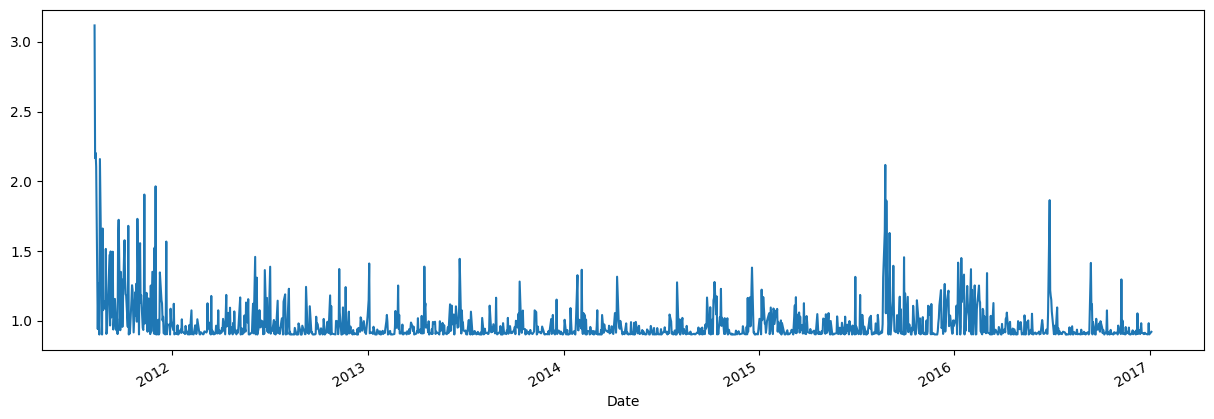

In [ ]:
df2.loc['2011-08-09':]['ARCH(1)'].plot(figsize=(15,5));

AS you can see we have start with very high variance

In [ ]:
fcast_arch1 = res_arch_1.forecast(horizon=N_test, reindex=True, start='2011-08-01')

In [ ]:
# Let's check the variance surrounded by our value
fcast_arch1.variance['2011-07-28':'2011-08-5']

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,0.859608,0.971107,0.991484,0.995207,0.995888,0.996012,0.996035,0.996039,0.996040,0.996040,...,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604
2011-08-02,2.166701,1.209982,1.035139,1.003186,0.997346,0.996279,0.996084,0.996048,0.996042,0.996040,...,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604
2011-08-03,0.858533,0.970910,0.991448,0.995201,0.995887,0.996012,0.996035,0.996039,0.996040,0.996040,...,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604
2011-08-04,5.365751,1.794618,1.141983,1.022712,1.000914,0.996931,0.996203,0.996070,0.996046,0.996041,...,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604
2011-08-05,0.822501,0.964325,0.990244,0.994981,0.995847,0.996005,0.996034,0.996039,0.996040,0.996040,...,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604,0.99604


In [ ]:
fcast_arch1.variance.loc['2011-08-09'].to_numpy().shape

(500,)

In [ ]:
df2.index.get_loc('2011-08-09')

402

In [ ]:
df2.index[402 + 500]

Timestamp('2013-08-06 00:00:00')

In [ ]:
df2.loc['2011-08-10':'2013-08-06','ARCH(1) Forecast'] = np.sqrt(
    fcast_arch1.variance.loc['2011-08-09'].to_numpy()
)

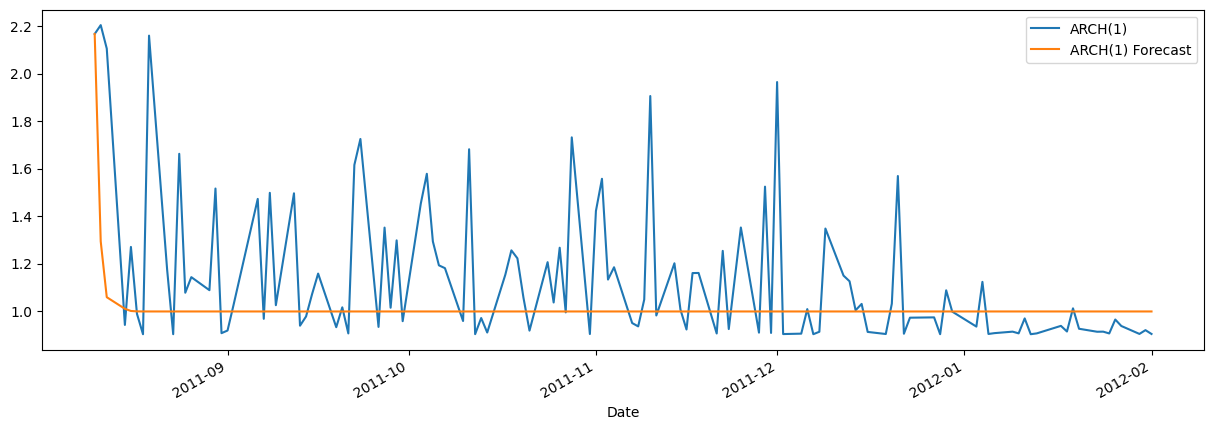

In [ ]:
# Let's plot
df2.loc['2011-08-10':'2012-02-01'][['ARCH(1)', 'ARCH(1) Forecast']].plot(figsize=(15,5));

As you can see it starts and then converge to some value

##### Now let's see for small variance and see where it converges

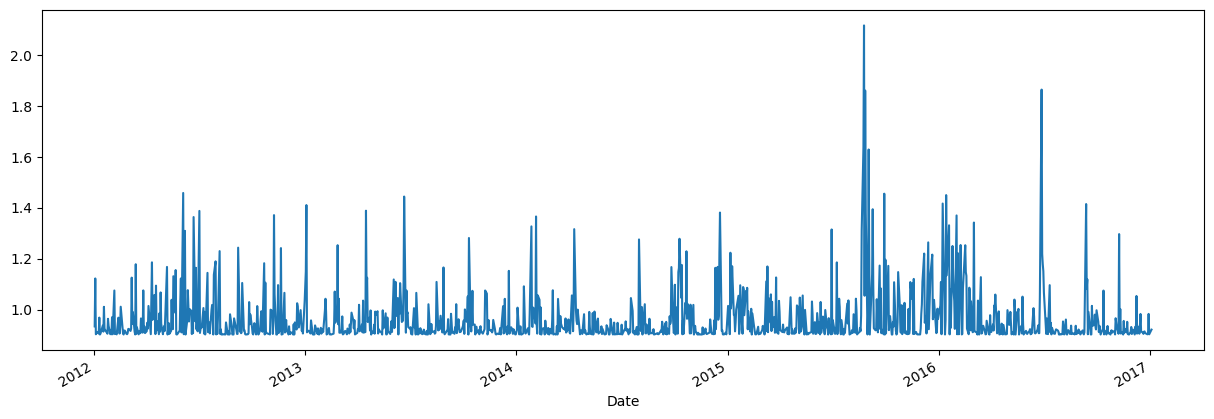

In [ ]:
df2.loc['2012-01-01':]['ARCH(1)'].plot(figsize=(15,5));

As this value is lower then the previous one

In [ ]:
df2.index[408 + 500]

Timestamp('2013-08-14 00:00:00')

In [ ]:
df2.loc['2011-08-18':'2013-08-14','ARCH(1) Forecast Low'] = np.sqrt(
    fcast_arch1.variance.loc['2011-08-17'].to_numpy()
)

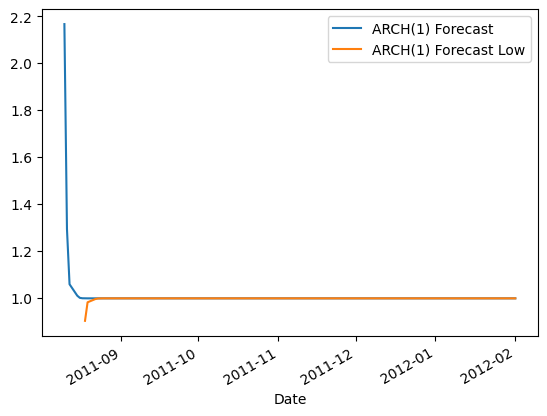

In [ ]:
# Let's plot
df2.loc['2011-08-01':'2012-02-01'][['ARCH(1) Forecast', 'ARCH(1) Forecast Low']].plot();

As you can see both value approach to the same value

In [ ]:
# Let's verify
fcast_arch1.variance.loc['2011-08-17'].to_numpy()[-1]

0.9960401735616118

In [ ]:
fcast_arch1.variance.loc['2011-08-9'].to_numpy()[-1]

0.9960401735616118

## GARCH (1,1)

In [ ]:
garch11 = arch_model(train['Scaled'], vol='GARCH', p=1, q=1)

In [ ]:
res = garch11.fit(update_freq=10)

Iteration:     10,   Func. Count:     63,   Neg. LLF: 2265.506436491207
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2265.50643408926
            Iterations: 12
            Function evaluations: 72
            Gradient evaluations: 12


In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2265.51
Distribution:                  Normal   AIC:                           4539.01
Method:            Maximum Likelihood   BIC:                           4560.91
                                        No. Observations:                 1762
Date:                Fri, Aug 02 2024   Df Residuals:                     1761
Time:                        10:48:25   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0287  1.866e-02      1.538      0.124 [-7.873e-03,6.525e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0481  1.105e-02      4.354  1.336e-05 [2.646e-02,6.979e-02]
alpha[1]       0.1532  2.604e-02      5.885  3.992e-09     [  0.102,  0.204]
beta[1]        0.7977  2.692e-02     29.633 5.626e-193     [  0.745,  0.850]
============================================================================

Covariance estimator: robust
"""

In [ ]:
df2['GARCH (1,1)'] = res.conditional_volatility

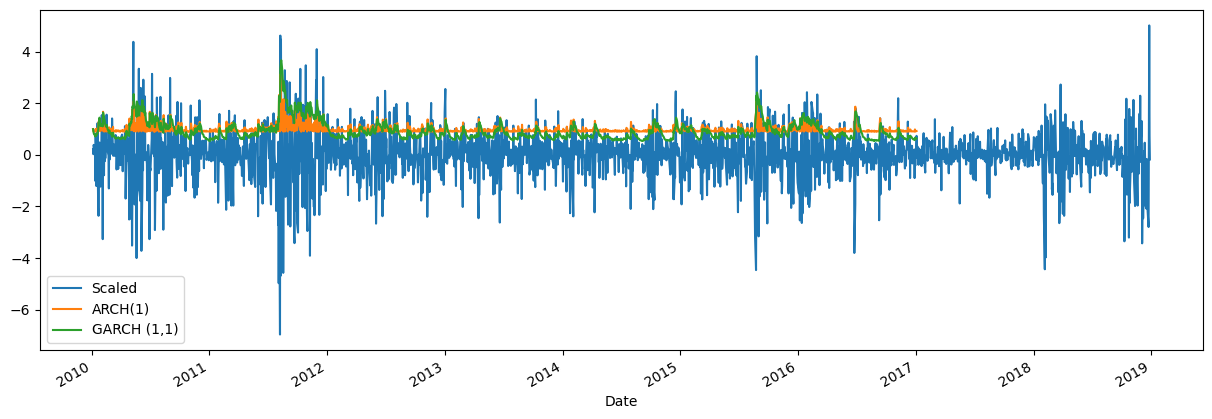

In [ ]:
# Let's plot
df2[['Scaled', 'ARCH(1)', 'GARCH (1,1)']].plot(figsize=(15,5));

We can clearly see that the garch model is better the arch

In [ ]:
# Let's predict from the same data we do for arch
fcast_garch11 = res.forecast(horizon=N_test, reindex=False, start='2011-08-09')

In [ ]:
# Let's store
df2.loc['2011-08-10':'2013-08-06','GARCH (1,1) Forecast'] = np.sqrt(
    fcast_garch11.variance.loc['2011-08-09'].to_numpy()
)

In [ ]:
df2['AbsScaled'] = df2['Scaled'].abs()

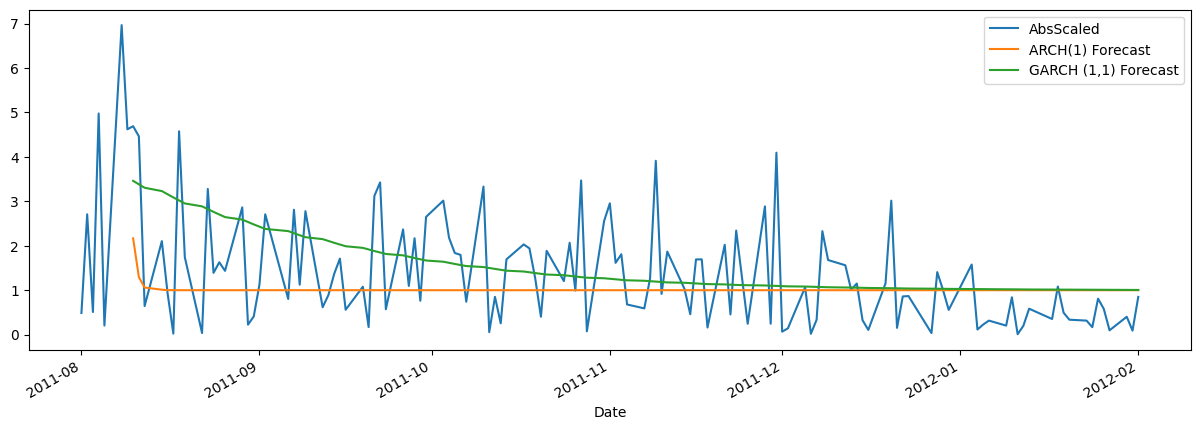

In [ ]:
# Let's plot
df2.loc['2011-08-01':'2012-02-01'][['AbsScaled', 'ARCH(1) Forecast', 'GARCH (1,1) Forecast']].plot(figsize=(15,5));

As we can see the GARACH (1,1) starts with high and then converge to some value slow as compared to ARCH (1)

As we know that the studentT distriubution works well in financial data <br>
Let's do the same but with different dist parameter

In [ ]:
garch11t = arch_model(train['Scaled'], vol='GARCH', p=1, q=1, dist='StudentsT')

In [ ]:
garch11t_res = garch11t.fit(update_freq=10)

Iteration:     10,   Func. Count:     74,   Neg. LLF: 2223.8893078616766
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2223.491541651447
            Iterations: 16
            Function evaluations: 112
            Gradient evaluations: 16


In [ ]:
garch11t_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2223.49
Distribution:      Standardized Student's t   AIC:                           4456.98
Method:                  Maximum Likelihood   BIC:                           4484.35
                                              No. Observations:                 1762
Date:                      Fri, Aug 02 2024   Df Residuals:                     1761
Time:                              11:06:28   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0469  1.668e-02      2.815  4.879e-03 [1.426e-02,7.962e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0404  9.431e-03      4.279  1.876e-05 [2.187e-02,5.884e-02]
alpha[1]       0.1665  2.598e-02      6.408  1.476e-10     [  0.116,  0.217]
beta[1]        0.8041  2.426e-02     33.138 8.498e-241     [  0.756,  0.852]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.4311      0.694      7.826  5.043e-15 [  4.071,  6.791]
========================================================================

Covariance estimator: robust
"""

In [ ]:
# Save values
df2['GARCH (1,1) T'] = garch11t_res.conditional_volatility

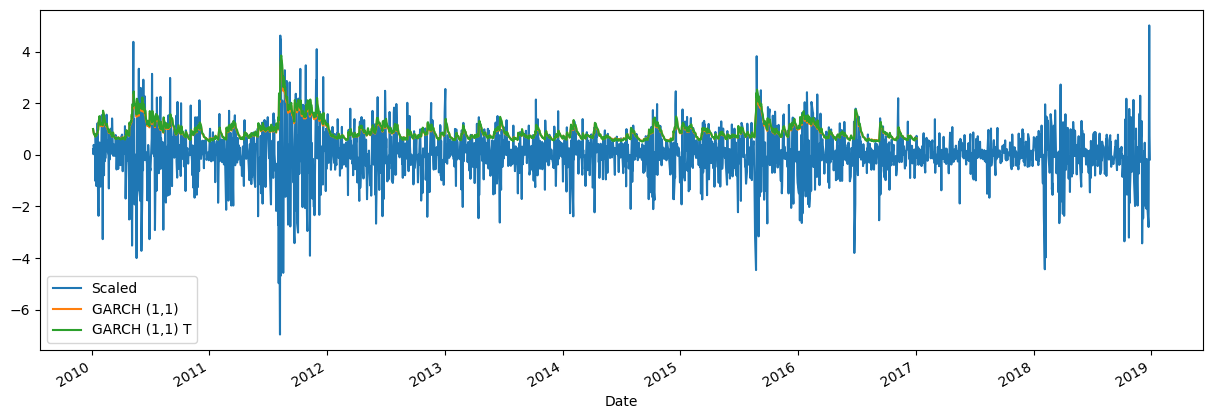

In [ ]:
# plot
df2[['Scaled', 'GARCH (1,1)', 'GARCH (1,1) T']].plot(figsize=(15,5));

In [ ]:
# Get forecast
fcast_garch11t = garch11t_res.forecast(horizon=N_test, reindex=False, start='2011-08-09')

In [ ]:
df2.loc['2011-08-10':'2013-08-06','GARCH (1,1) T Forecast'] = np.sqrt(
    fcast_garch11t.variance.loc['2011-08-09'].to_numpy()
)

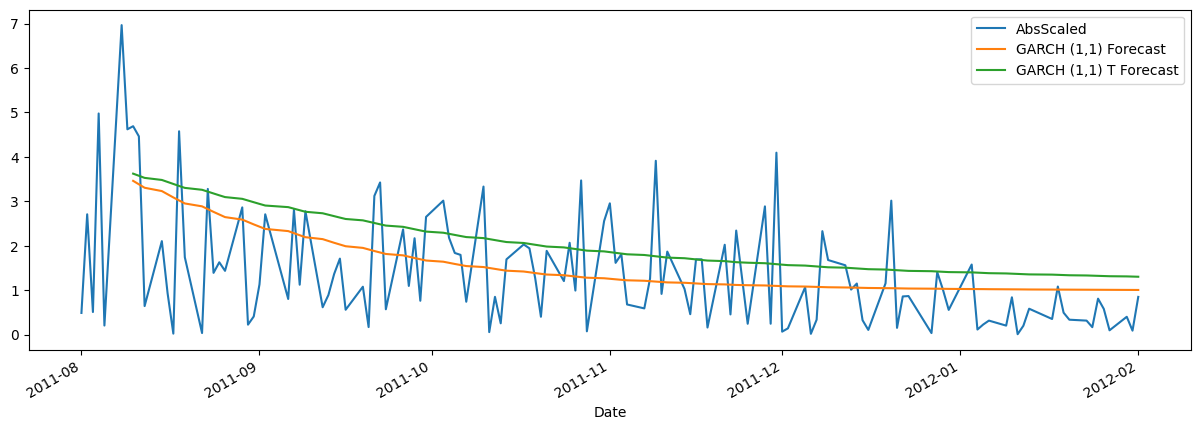

In [ ]:
# Let's plot
df2.loc['2011-08-01':'2012-02-01'][['AbsScaled', 'GARCH (1,1) Forecast', 'GARCH (1,1) T Forecast']].plot(figsize=(15,5));

As you can see GARCH (1,1) T starts above the GARCH (1,1) and converge slowly as compared to GARCH (1,1)

## GARCH (p,q)